In [21]:
import numpy as np
import cv2 as cv
import sys
sys.path.append("../")
from matplotlib import pyplot as plt
from quadtree import FixedQuadTree

In [22]:
def resize_image(image_path):
    img = cv.imread(image_path)
    resized_img = cv.resize(img, (224, 224))
    img = img[..., ::-1]
    return resized_img

# Paths to the 4 images
image_paths = ['test0.JPEG', 'test1.JPEG', 'test2.JPEG', 'test3.JPEG']

# Resize all images to 224x224
resized_images = [resize_image(path) for path in image_paths]

In [23]:
top_row = np.hstack((resized_images[0], resized_images[1]))
bottom_row = np.hstack((resized_images[2], resized_images[3]))
merged_image = np.vstack((top_row, bottom_row))

In [24]:
to_size =  (8, 8, 3)
fixed_length = 784

In [25]:
def seqence_image(img):
    img = cv.resize(img, (224 * 2, 224 * 2))
    img = img[..., ::-1]

    grey_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # grey_img = cv.GaussianBlur(grey_img, (3, 3), 0)

    edges = cv.Canny(grey_img, 80, 100)

    qdt = FixedQuadTree(domain = edges, fixed_length = fixed_length)

    seq_img = qdt.serialize(img, size = to_size)
    seq_img = np.asarray(seq_img)
    seq_img = np.reshape(seq_img, [to_size[0], -1, to_size[2]])

    return seq_img, qdt

In [26]:
seq_img, qdt = seqence_image(merged_image)

seq_patch length: 784


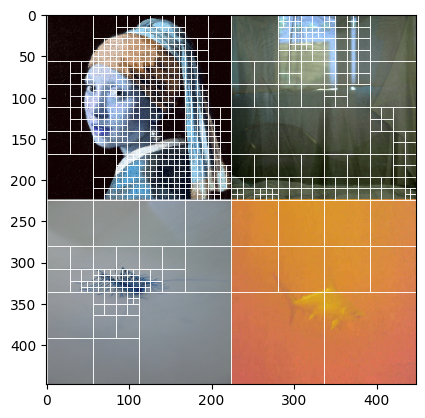

In [27]:
fig, ax = plt.subplots()
img = merged_image
ax.imshow(img, cmap = 'gray')
qdt.draw(ax=ax)
plt.show()
plt.close()